# California Test Scores

### Data
Url for the California Test Score Data Set from the following website:

https://vincentarelbundock.github.io/Rdatasets/datasets.html

Data dictionary:

https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv

The target variable is named "testscr" which is the total test score. It is the summation of the reading score and math score for each student.

### Research Objectives
1. Exploratory Analysis
Examining the dataset, how can we better understand test score characteristics through fundamental data visualization and descriptive statistics?

2. Regression of California Test Scores
Using the characteristics of California schools, can we predict test score?

3. T-test/Chi-square Test
Can we see if there is a statistically signicant difference in test scores and identify what attributes are marginalizing California test score between groups?

**Part 1: Regression on California Test Scores**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv", sep=',', index_col=0)
data.head()

KeyboardInterrupt: 

1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.  

I chose testscore(y) = income, lunch, english.
I chose these variables to see if there was a positive or negative relationship between test scores in a district and low income students & english learners. I added average income per district because I would assume that would be an significant factor in test scores.

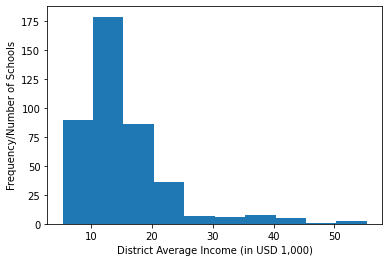

In [4]:
plt.hist(data['avginc'])
plt.xlabel('District Average Income (in USD 1,000)')
plt.ylabel('Frequency/Number of Schools')
plt.show()

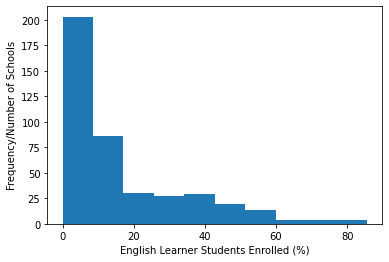

In [5]:
plt.hist(data['elpct'])
plt.xlabel('English Learner Students Enrolled (%)')
plt.ylabel('Frequency/Number of Schools')
plt.show()

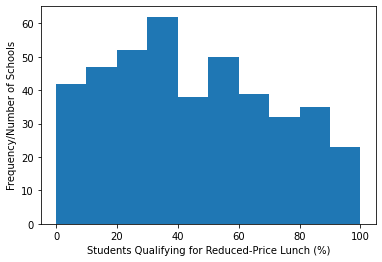

In [6]:
plt.hist(data['mealpct'])
plt.xlabel('Students Qualifying for Reduced-Price Lunch (%)')
plt.ylabel('Frequency/Number of Schools')
plt.show()

1.2 Visualize the dependency of the target on each feature from 1.1.

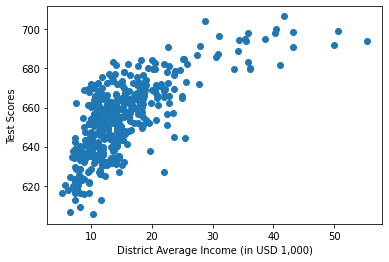

In [7]:
#expenditure per student($) and district average income (in USD$1000)
plt.scatter(data['avginc'], data['testscr'])
plt.xlabel('District Average Income (in USD 1,000)')
plt.ylabel('Test Scores')
plt.show()

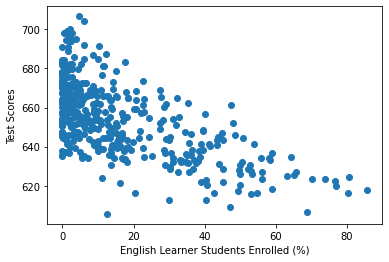

In [8]:
#English learner percentage
plt.scatter(data['elpct'], data['testscr'])
plt.xlabel('English Learner Students Enrolled (%)')
plt.ylabel('Test Scores')
plt.show()

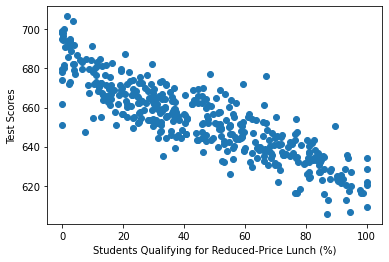

In [9]:
#Students qualifying for reduced-lunch
plt.scatter(data['mealpct'], data['testscr'])
plt.xlabel('Students Qualifying for Reduced-Price Lunch (%)')
plt.ylabel('Test Scores')
plt.show()

1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

In [10]:
data = data.loc[:, data.columns != 'readscr']
data = data.loc[:, data.columns != 'mathscr']
data = data.loc[:, data.columns != 'district']
data = data.loc[:, data.columns != 'county']
data = data.loc[:, data.columns != 'grspan']
#data = data.loc[:, data.columns != 'distcod'] #dropped because this is an ID column

#Split data in training and test set
y = data['testscr']
x = data.loc[:, data.columns != 'testscr']
print(y)
x.head()

1      690.799988
2      661.200012
3      643.599976
4      647.700012
5      640.849976
          ...    
416    704.300049
417    706.750000
418    645.000000
419    672.200012
420    655.750000
Name: testscr, Length: 420, dtype: float64


,distcod,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
1,75119,195,10.900000,0.510200,2.040800,67,0.343590,6384.911133,17.889910,22.690001,0.000000
2,61499,240,11.150000,15.416700,47.916698,101,0.420833,5099.380859,21.524664,9.824000,4.583333
3,61549,1550,82.900002,55.032299,76.322601,169,0.109032,5501.954590,18.697226,8.978000,30.000002
4,61457,243,14.000000,36.475399,77.049202,85,0.349794,7101.831055,17.357143,8.978000,0.000000
5,61523,1335,71.500000,33.108601,78.427002,171,0.128090,5235.987793,18.671329,9.080333,13.857677


In [24]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from tabulate import tabulate
from sklearn.metrics import mean_squared_error

# Models
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


#0.75/0.25 split
X_train, X_test, y_train, y_test = train_test_split(x, y)

print(x.shape)
X_train.shape
#training data is using 315/420 observations

(420, 11)


(315, 11)

In [22]:
def default_modeler(model, X_train, X_test, y_train, y_test):
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)
    score = model.score(X_test, y_test)
    cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring="neg_mean_squared_error"))
    return score, cv_score, mse, model, y_pred

In [29]:
list_of_output = []
list_of_pred = []
for model in [Ridge(max_iter=10000), Lasso(max_iter=10000), KNeighborsRegressor(), SGDRegressor(max_iter=100000), SVR(), RandomForestRegressor()]:
    result = list(default_modeler(model, X_train, X_test, y_train, y_test))
    pred = result[-1]
    list_of_output.append(result[0:5])
    list_of_pred.append(pred)


In [30]:
head = ["Score", "CV Score (neg_mean_squared_error)", "MSE", "Model"]
print(tabulate(list_of_output, headers=head, tablefmt="grid"))

+--------------+----------------+-------------------------------------+-------------------------------+--------------------------------------------------------------------+
|              |          Score |   CV Score (neg_mean_squared_error) | MSE                           | Model                                                              |
+==============+================+=====================================+===============================+====================================================================+
|  0.838807    |  -76.809       |                        63.3951      | Ridge(max_iter=10000)         | [658.48441184 665.99823421 689.46210219 664.49977558 621.09063696  |
|              |                |                                     |                               |  648.31079404 644.51239595 618.60651472 655.00418761 674.78871933  |
|              |                |                                     |                               |  624.03811927 661.58826477 668.

In [37]:
default_models = pd.DataFrame(list_of_output, columns=  ["Score", "CV Score", "MSE", "Model Pipe", "Pred"])
np.set_printoptions(suppress=True)
default_models

,Score,CV Score,MSE,Model Pipe,Pred
0,8.388069e-01,-7.680899e+01,6.339506e+01,Ridge(max_iter=10000),"[658.4844118353973, 665.9982342120728, 689.462..."
1,8.373587e-01,-7.598111e+01,6.396460e+01,Lasso(max_iter=10000),"[658.6230699092821, 666.2011731982014, 688.969..."
2,2.156061e-01,-3.473103e+02,3.084914e+02,KNeighborsRegressor(),"[666.3699951171874, 666.0800048828124, 658.919..."
3,-2.743313e+34,-8.491039e+36,1.078908e+37,SGDRegressor(max_iter=100000),"[3.3747814055731973e+18, 3.4644850927867346e+1..."
4,-8.765875e-04,-3.521373e+02,3.936311e+02,SVR(),"[653.7039897689726, 654.0429093357425, 653.873..."
5,8.296311e-01,-8.323072e+01,6.700377e+01,"(DecisionTreeRegressor(max_features='auto', ra...","[660.65, 661.4344958496093, 689.3965075683594,..."


In [ ]:
#instantiate knn regressor with default k=5
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
print("accuracy:"+str(knn.score(x_test, y_test)))
y_pred = knn.predict(x_test)


accuracy:0.05862138204487499


In [ ]:
lr = LinearRegression()
ridge = Ridge().fit(x_train, y_train)
lasso = Lasso().fit(x_train, y_train)
lr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.388e+02, tolerance: 1.130e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


LinearRegression()

In [ ]:
import numpy as np
#linear regression scores
print("Training set score: {:.2f}".format(lr.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(x_test, y_test)))

#cross validation
from sklearn.model_selection import cross_val_score

print(np.mean(cross_val_score(LinearRegression(), x_train, y_train, cv=10, scoring="r2")))

Training set score: 0.79
Test set score: 0.86
0.7679218848149731


In [ ]:
#ridge
print("Training set score: {:.2f}".format(ridge.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(x_test, y_test)))
cross_val_score(Ridge(), x_train, y_train, scoring="r2") 

Training set score: 0.79
Test set score: 0.86


array([0.81211578, 0.7103415 , 0.78289556, 0.72774251, 0.84687408])

In [ ]:
#lasso
print("Training set score: {:.2f}".format(lasso.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(x_test, y_test)))
cross_val_score(Lasso(max_iter=10000), x_train, y_train, scoring="r2") 

Training set score: 0.79
Test set score: 0.86


array([0.8133803 , 0.71115346, 0.78198922, 0.72766813, 0.84762569])

In [ ]:
kfold = KFold(n_splits=5) #default
from statistics import mean 
print("KFold:\n{}".format(
cross_val_score(KNeighborsRegressor(), x_train, y_train, cv=kfold)))

KFold:
[ 0.17509949  0.01416409  0.25719232 -0.12664011  0.0731834 ]


In [ ]:
#standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
scaler.transform(x_train)  
scaler.transform(x_test)

array([[ 1.11601183,  1.32058726,  1.37614987, ...,  0.26106367,
        -0.42031514,  0.7670041 ],
       [ 0.39742902, -0.63293841, -0.64591405, ..., -0.18197633,
        -0.58680072, -0.49165575],
       [ 0.66607679, -0.60873365, -0.61752756, ..., -0.53508019,
         0.39098473, -0.82839403],
       ...,
       [ 0.69947932, -0.04824223, -0.0315569 , ...,  0.09081709,
         0.45969609, -0.22476589],
       [ 0.74344506, -0.53536298, -0.53646837, ..., -0.46955081,
        -0.23965476, -0.85208159],
       [-1.5667544 , -0.63142561, -0.63487485, ..., -2.1849683 ,
         0.50250998, -0.85208159]])

In [ ]:
#rerunning with scaled daata
knn.fit(x_train, y_train)
lr = LinearRegression()
ridge = Ridge().fit(x_train, y_train)
lasso = Lasso(max_iter=1000).fit(x_train, y_train)
lr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.388e+02, tolerance: 1.130e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


LinearRegression()

In [ ]:
#knn
print("knn accuracy:"+str(knn.score(x_test, y_test)))

#linear
print("Training set score: {:.2f}".format(lr.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(x_test, y_test)))
print(np.mean(cross_val_score(LinearRegression(), x_train, y_train, cv=10, scoring="r2")))

#ridge
print("Training set score: {:.2f}".format(ridge.score(x_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(x_test, y_test)))
print(np.mean(cross_val_score(Ridge(), x_train, y_train, scoring="r2")))

#lasso
print("Training set score: {:.2f}".format(lasso.score(x_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(x_test, y_test)))
print(np.mean(cross_val_score(Lasso(max_iter=10000), x_train, y_train, scoring="r2")))

knn accuracy:0.05862138204487499
Training set score: 0.79
Test set score: 0.86
0.7679218848149731
Training set score: 0.79
Test set score: 0.86
0.7759938870681063
Training set score: 0.79
Test set score: 0.86
0.7763633597613551


In [ ]:
#coefficients
print("lr.coef_: {}".format(lr.coef_))
print("ridge.coef_: {}".format(ridge.coef_))
print("lasso.coef_: {}".format(lasso.coef_))

lr.coef_: [ 1.13416088e-04 -4.99540257e-04  6.94684997e-03 -9.50724358e-02
 -3.45947975e-01  1.01714255e-03  6.44963023e+00  7.78432378e-04
 -2.60582890e-01  6.88214810e-01 -2.12883237e-01]
ridge.coef_: [ 1.11866424e-04 -4.24581709e-04  4.07529139e-03 -9.89688189e-02
 -3.44400226e-01  1.57719825e-03  3.14531004e+00  8.42416669e-04
 -2.78359049e-01  6.89186586e-01 -2.15324858e-01]
lasso.coef_: [ 1.18583010e-04 -7.76249031e-04  9.86773942e-03 -8.80010624e-02
 -3.59240929e-01  1.98712939e-03  0.00000000e+00  1.48833536e-03
 -0.00000000e+00  6.50385193e-01 -2.09946957e-01]


1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

Yes, the cv scores improve for each model when the best parameters are sued (n_neighbors = 11, for lasso & ridge best parameter was alpha=0.1

In [ ]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y)

#create dictionary data object with keys equal to parameter name 'n_neighbors' 
#for knn model and values equal to range of k values to create models for

param_grid = {'n_neighbors': np.arange(1, 15, 2)} #np.arange creates sequence of numbers for each k value

grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
grid.fit(x_train, y_train)
 
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(x_test, y_test)))

best mean cross-validation score: 0.102
best parameters: {'n_neighbors': 11}
test-set score: 0.183


In [ ]:
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(x_train, y_train)
print("accuracy:"+str(knn.score(x_test, y_test)))
y_pred = knn.predict(x_test)


accuracy:0.20500342959664397


In [ ]:
param_grid = {'alpha': np.arange(0.1, 10,0.1)}

grid = GridSearchCV(Lasso(max_iter=10000), param_grid, cv=5)
grid.fit(x_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(x_test, y_test)))


best mean cross-validation score: 0.798
best parameters: {'alpha': 0.1}
test-set score: 0.800


In [ ]:
param_grid = {'alpha': np.arange(0.1, 10,0.1)}

grid = GridSearchCV(Ridge(max_iter=10000), param_grid, cv=5)
grid.fit(x_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(x_test, y_test)))

best mean cross-validation score: 0.798
best parameters: {'alpha': 0.5}
test-set score: 0.800


1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

my two best models were ridge and lasso according to cross validation scores.

you can see that the coefficients are relatively similar so they agree on which features are important. The only difference is that for some of the coefficients in lasso, there were features with a coefficient of 0.

In [ ]:
print("ridge.coef_: {}".format(ridge.coef_))
print("lasso.coef_: {}".format(lasso.coef_))

ridge.coef_: [ 1.11866424e-04 -4.24581709e-04  4.07529139e-03 -9.89688189e-02
 -3.44400226e-01  1.57719825e-03  3.14531004e+00  8.42416669e-04
 -2.78359049e-01  6.89186586e-01 -2.15324858e-01]
lasso.coef_: [ 1.18583010e-04 -7.76249031e-04  9.86773942e-03 -8.80010624e-02
 -3.59240929e-01  1.98712939e-03  0.00000000e+00  1.48833536e-03
 -0.00000000e+00  6.50385193e-01 -2.09946957e-01]


1.6 Discuss which final model you would choose to predict new data.

I would most likely go with the ridge regression model. it had the best cross validation score amongst the models used.